<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovateable:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')

In [3]:
house.shape

(1460, 81)

In [4]:
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


DATA CLEANING

In [5]:
house.isna().sum().head(40)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
dtype: int64

In [6]:
house.isna().sum().tail(42)

Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
sortna = (house.isna().sum()/(len(house))*100)

In [9]:
(house.isna().sum()/(len(house))*100).tail(42)

Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageCars        0.000000
GarageArea        0.000000
GarageQual        5.547945
GarageCond        5.547945
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
PoolQC           99.520548
Fence            80.753425
MiscFeature      96.301370
MiscVal           0.000000
M

First of all will remove non residential houses from the dataset as A	Agriculture,
C	Commercial and I	Industrial

In [10]:
house.shape

(1460, 81)

In [11]:
house[(house.MSZoning == 'A (all)') | (house.MSZoning == 'C (all)') | (house.MSZoning == 'I (all)')].count()

Id               10
MSSubClass       10
MSZoning         10
LotFrontage      10
LotArea          10
                 ..
MoSold           10
YrSold           10
SaleType         10
SaleCondition    10
SalePrice        10
Length: 81, dtype: int64

In [12]:
(house.MSZoning == 'C (all)').sum()

10

In [13]:
house['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [14]:
mszc = house[house['MSZoning'] == 'C (all)']
mszc

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
557,558,50,C (all),60.0,11040,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,9,2006,COD,Normal,108000
711,712,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,102776
812,813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,Shed,54,6,2010,WD,Alloca,55993
916,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1279,1280,50,C (all),60.0,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,COD,Abnorml,68400


In [15]:
house.drop(mszc.index, inplace = True)

In [16]:
house.shape

(1450, 81)

REPLACING MISSING VALUES WITH EITHER 0 OR NOT AVAIALABLE

In [17]:
house['LotFrontage'].isna().value_counts()

False    1191
True      259
Name: LotFrontage, dtype: int64

In [18]:
house['LotFrontage'].fillna(value='0', inplace=True)

In [19]:
house['LotFrontage'].isna().value_counts()

False    1450
Name: LotFrontage, dtype: int64

In [20]:
house['Alley'].fillna(value='No alley access', inplace=True)
house['Alley'].isna().value_counts()
house['Alley'].unique()

array(['No alley access', 'Grvl', 'Pave'], dtype=object)

In [21]:
house['MasVnrType'].fillna(value='None', inplace=True)
house['MasVnrType'].isna().value_counts()
house['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [22]:
house['MasVnrArea'].fillna(value='0', inplace=True)
house['MasVnrArea'].isna().value_counts()
house['MasVnrArea'].unique()[0]

196.0

In [23]:
house['BsmtQual'].fillna(value='No Basement', inplace=True)
house['BsmtQual'].isna().value_counts()

False    1450
Name: BsmtQual, dtype: int64

In [24]:
house['BsmtCond'].fillna(value='No Basement', inplace=True)
house['BsmtCond'].isna().value_counts()

False    1450
Name: BsmtCond, dtype: int64

In [25]:
house['BsmtExposure'].fillna(value='No Basement', inplace=True)
house['BsmtExposure'].isna().value_counts()
house['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', 'No Basement'], dtype=object)

In [26]:
house['BsmtFinType1'].fillna(value='No Basement', inplace=True)
house['BsmtFinType1'].isna().value_counts()
house['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'No Basement', 'LwQ'],
      dtype=object)

In [27]:
house['BsmtFinType2'].fillna(value='No Basement', inplace=True)
house['BsmtFinType2'].isna().value_counts()

False    1450
Name: BsmtFinType2, dtype: int64

In [28]:
house['Electrical'].isna().value_counts()
house['Electrical'].fillna(value='Mixed', inplace=True)

In [29]:
house['FireplaceQu'].fillna(value='No Fireplace', inplace=True)
house['FireplaceQu'].isna().value_counts()

False    1450
Name: FireplaceQu, dtype: int64

In [30]:
house['GarageType'].fillna(value='No Garage', inplace=True)
house['GarageType'].isna().value_counts()


False    1450
Name: GarageType, dtype: int64

In [31]:
(house['GarageType']=="No Garage").value_counts()


False    1371
True       79
Name: GarageType, dtype: int64

In [32]:
house['GarageYrBlt'].isna().value_counts()


False    1371
True       79
Name: GarageYrBlt, dtype: int64

In [33]:
house['GarageYrBlt'].fillna(value='0', inplace=True)
house['GarageYrBlt'].isna().value_counts()

False    1450
Name: GarageYrBlt, dtype: int64

In [34]:
house['GarageYrBlt'].unique()

array([2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993.0, 2004.0, 1973.0,
       1931.0, 1939.0, 1965.0, 2005.0, 1962.0, 2006.0, 1960.0, 1991.0,
       1970.0, 1967.0, 1958.0, 1930.0, 2002.0, 1968.0, 2007.0, 2008.0,
       1957.0, 1920.0, 1966.0, 1959.0, 1995.0, 1954.0, 1953.0, '0',
       1983.0, 1977.0, 1997.0, 1985.0, 1963.0, 1981.0, 1964.0, 1999.0,
       1935.0, 1990.0, 1945.0, 1987.0, 1989.0, 1915.0, 1956.0, 1948.0,
       1974.0, 2009.0, 1950.0, 1961.0, 1921.0, 1979.0, 1951.0, 1969.0,
       1936.0, 1975.0, 1971.0, 1923.0, 1984.0, 1926.0, 1955.0, 1986.0,
       1988.0, 1916.0, 1932.0, 1972.0, 1918.0, 1980.0, 1924.0, 1996.0,
       1940.0, 1949.0, 1994.0, 1910.0, 1978.0, 1982.0, 1992.0, 1925.0,
       1941.0, 2010.0, 1927.0, 1947.0, 1937.0, 1942.0, 1938.0, 1952.0,
       1928.0, 1922.0, 1934.0, 1906.0, 1914.0, 1946.0, 1908.0, 1929.0,
       1933.0], dtype=object)

In [35]:
# 0 is wrong therefore after seeing the corr matrix I will drop this column

In [36]:
house['GarageFinish'].isna().value_counts()

False    1371
True       79
Name: GarageFinish, dtype: int64

In [37]:
house['GarageFinish'].fillna(value='No Garage', inplace=True)
house['GarageFinish'].isna().value_counts()

False    1450
Name: GarageFinish, dtype: int64

In [38]:
house['GarageQual'].fillna(value='No Garage', inplace=True)
house['GarageQual'].isna().value_counts()

False    1450
Name: GarageQual, dtype: int64

In [39]:
house['GarageCond'].fillna(value='No Garage', inplace=True)
house['GarageCond'].isna().value_counts()

False    1450
Name: GarageCond, dtype: int64

In [40]:
house['PoolQC'].fillna(value='No Pool', inplace=True)
house['PoolQC'].isna().value_counts()

False    1450
Name: PoolQC, dtype: int64

In [41]:
house['Fence'].fillna(value='No Fence', inplace=True)
house['Fence'].isna().value_counts()

False    1450
Name: Fence, dtype: int64

In [42]:
house['MiscFeature'].fillna(value='None', inplace=True)
house['MiscFeature'].isna().value_counts()

False    1450
Name: MiscFeature, dtype: int64

In [43]:
(house.isna().sum()/(len(house))*100).head(40)

Id              0.0
MSSubClass      0.0
MSZoning        0.0
LotFrontage     0.0
LotArea         0.0
Street          0.0
Alley           0.0
LotShape        0.0
LandContour     0.0
Utilities       0.0
LotConfig       0.0
LandSlope       0.0
Neighborhood    0.0
Condition1      0.0
Condition2      0.0
BldgType        0.0
HouseStyle      0.0
OverallQual     0.0
OverallCond     0.0
YearBuilt       0.0
YearRemodAdd    0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
BsmtFinType2    0.0
BsmtFinSF2      0.0
BsmtUnfSF       0.0
TotalBsmtSF     0.0
Heating         0.0
dtype: float64

ARE THE VARIABLES NORMALLY DISTRIBUTED? as per below a few are not and are clearly skewed


In [44]:
from scipy.stats import norm

/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

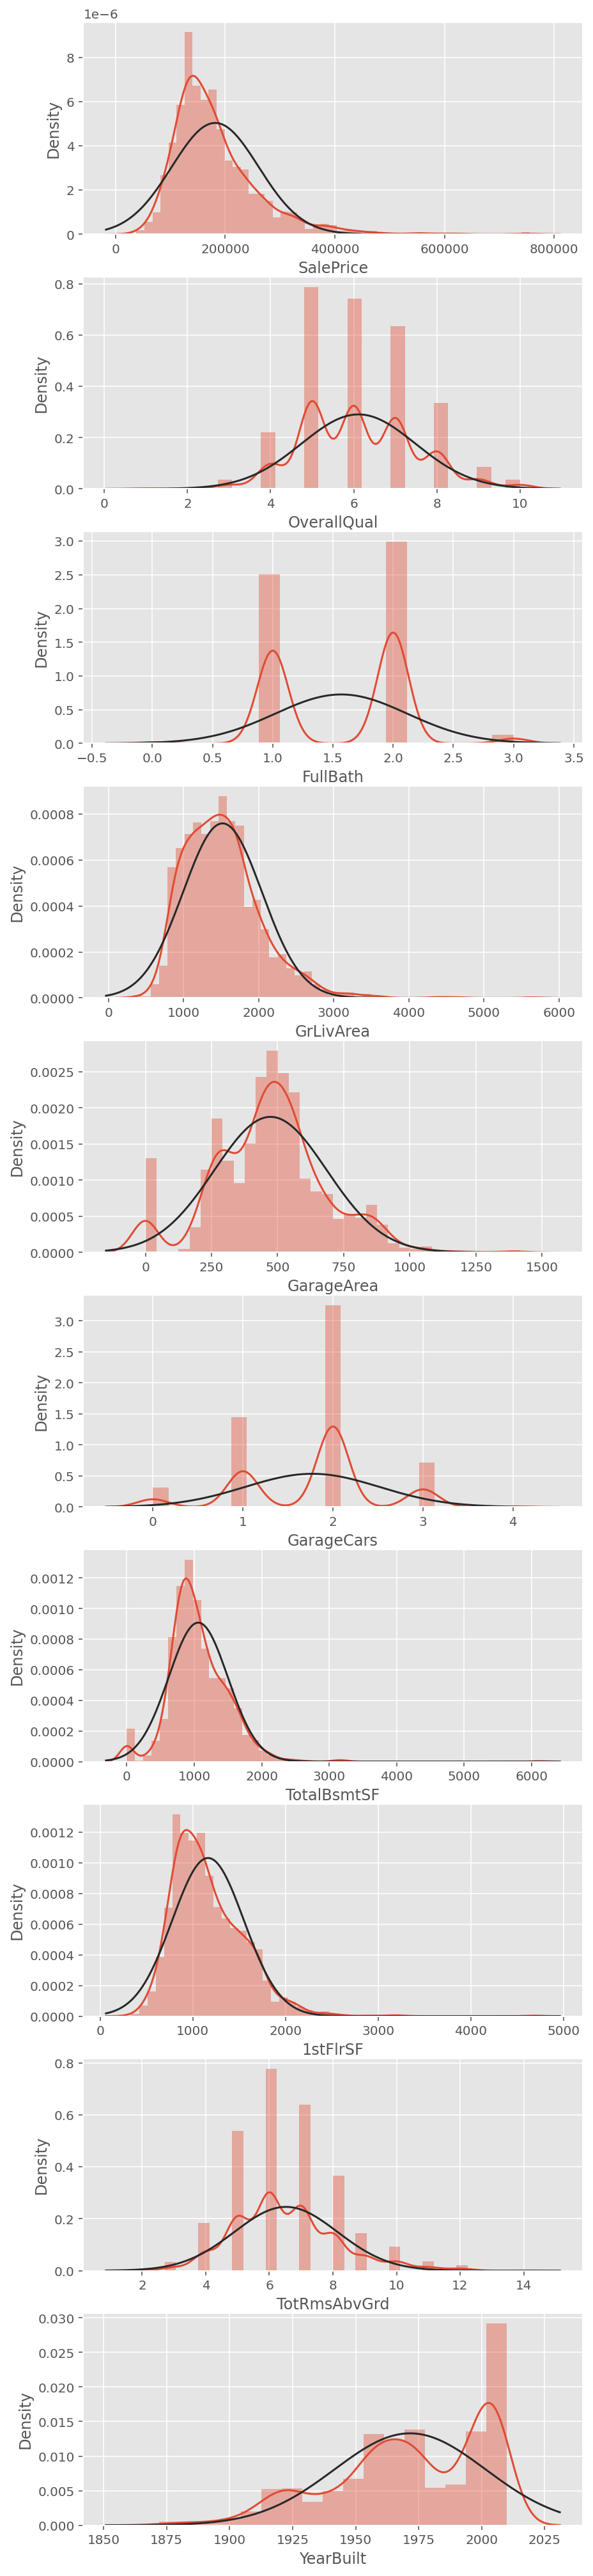

In [45]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10,figsize=(7,36));
sns.distplot(house['SalePrice'], fit=norm, ax=ax1)
sns.distplot(house['OverallQual'], fit=norm, ax=ax2)
sns.distplot(house['FullBath'], fit=norm, ax=ax3)
sns.distplot(house['GrLivArea'], fit=norm, ax=ax4)
sns.distplot(house['GarageArea'], fit=norm, ax=ax5)
sns.distplot(house['GarageCars'], fit=norm, ax=ax6)
sns.distplot(house['TotalBsmtSF'], fit=norm, ax=ax7)
sns.distplot(house['1stFlrSF'], fit=norm, ax=ax8)
sns.distplot(house['TotRmsAbvGrd'], fit=norm, ax=ax9)
sns.distplot(house['YearBuilt'], fit=norm, ax=ax10)

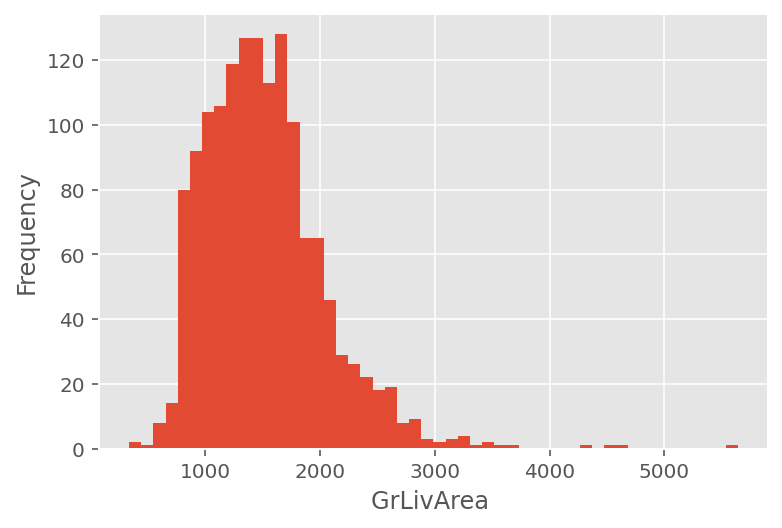

In [46]:
# Check the distribution for continuous data.
house['GrLivArea'].hist(bins=50)
plt.xlabel('GrLivArea ')
plt.ylabel('Frequency')
plt.show()

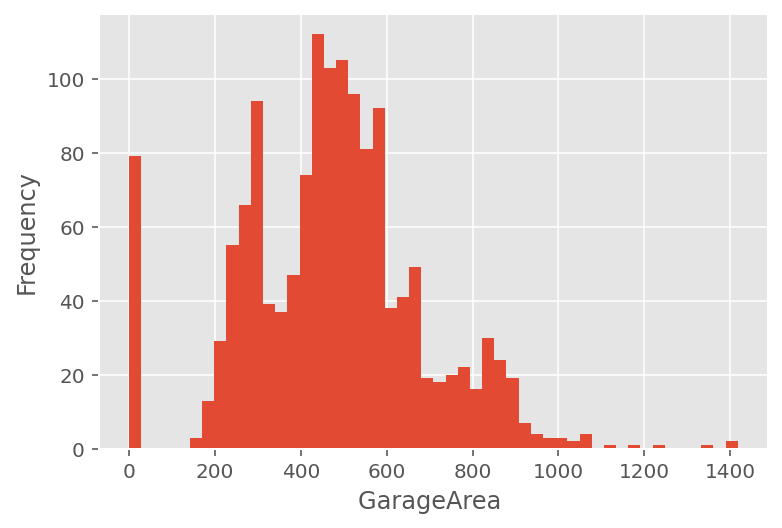

In [47]:
house['GarageArea'].hist(bins=50)
plt.xlabel('GarageArea ')
plt.ylabel('Frequency')
plt.show()

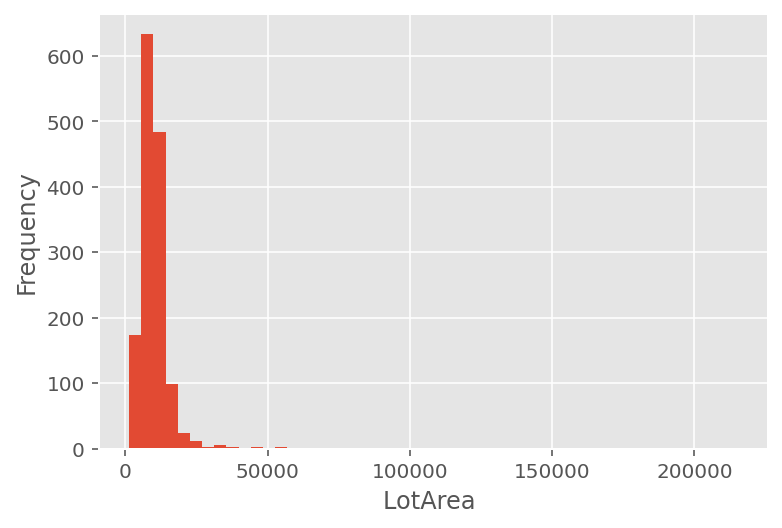

In [48]:
house['LotArea'].hist(bins=50)
plt.xlabel('LotArea ')
plt.ylabel('Frequency')
plt.show()

CHECK OUTLIERS FOR THE MOST DEPENDENT AND INDEPENDENT VARIABLES as per corr matrix below

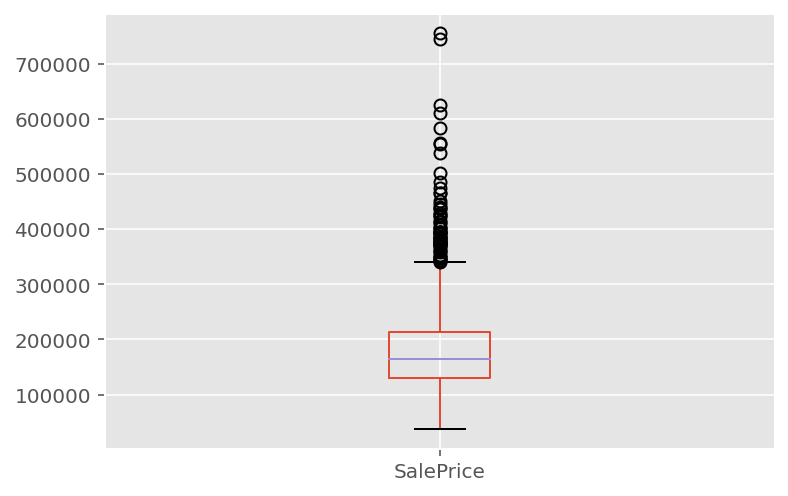

In [49]:
# Check outliers for depedent variable.
house['SalePrice'].plot.box()
plt.show()

I WILL LOG THE TARGET VARIABLE AS THERE ARE A FEW OUTLIERES.
It imporoves the model of 0.3-0.4

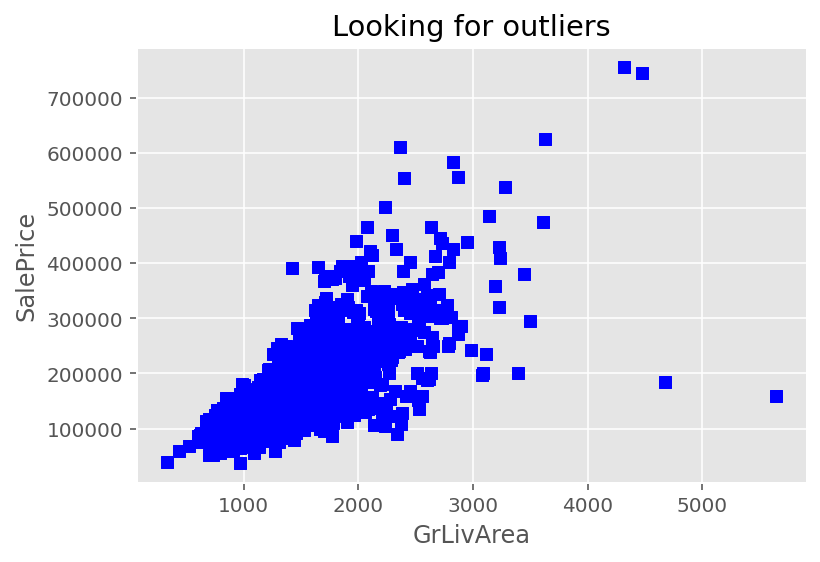

In [58]:
plt.scatter(house.GrLivArea, house.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

THERE ARE 2 BIG OUTLIERS on the bottom right, 2 big houses with a very low price therefore i tried to
log transform the salePrice variable. Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally. Also, as per trial and error this improves my overall CV score of around 0.3 bringing it to 0.84 from 0.81. For now I will keep the Sale Price as non log.

In [50]:
house.SalePrice = np.log1p(house.SalePrice)
house.SalePrice.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

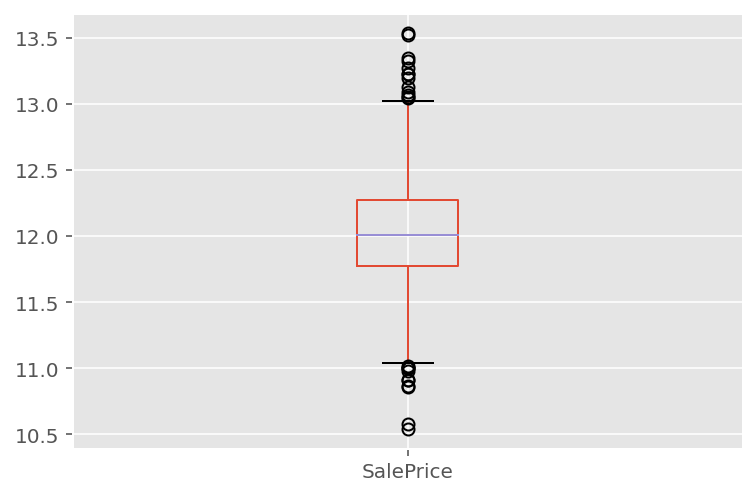

In [51]:
house['SalePrice'].plot.box()
plt.show()

In [52]:
# Given characteristics of the house that cannot be renovated. will create a list

In [53]:
fixed = ['MSSubClass','MSZoning',
    'LotFrontage', 'LotArea', 'LotShape','LandContour','Utilities','LotConfig','LandSlope',
    'Neighborhood','Condition1','Condition2', 'BldgType', 'HouseStyle', 
    'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
    'Foundation', 'BsmtQual', 'BsmtExposure', 'TotalBsmtSF', 
    '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
    'TotRmsAbvGrd', 'Fireplaces', 
    'GarageType', 'GarageYrBlt', 'GarageCars',
    'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 
    'YrSold','SalePrice'
]

In [54]:
house_fixed=house[fixed]

In [55]:
house_fixed

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,YrSold,SalePrice
0,60,RL,65,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,548,61,0,0,0,0,None,0,2008,12.247699
1,20,RL,80,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,460,0,0,0,0,0,None,0,2007,12.109016
2,60,RL,68,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,608,42,0,0,0,0,None,0,2008,12.317171
3,70,RL,60,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,642,35,272,0,0,0,None,0,2006,11.849405
4,60,RL,84,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,836,84,0,0,0,0,None,0,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62,7917,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,460,40,0,0,0,0,None,0,2007,12.072547
1456,20,RL,85,13175,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,500,0,0,0,0,0,None,0,2010,12.254868
1457,70,RL,66,9042,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,252,60,0,0,0,0,Shed,2500,2010,12.493133
1458,20,RL,68,9717,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,240,0,112,0,0,0,None,0,2010,11.864469


In [56]:
house_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1450 non-null   int64  
 1   MSZoning       1450 non-null   object 
 2   LotFrontage    1450 non-null   object 
 3   LotArea        1450 non-null   int64  
 4   LotShape       1450 non-null   object 
 5   LandContour    1450 non-null   object 
 6   Utilities      1450 non-null   object 
 7   LotConfig      1450 non-null   object 
 8   LandSlope      1450 non-null   object 
 9   Neighborhood   1450 non-null   object 
 10  Condition1     1450 non-null   object 
 11  Condition2     1450 non-null   object 
 12  BldgType       1450 non-null   object 
 13  HouseStyle     1450 non-null   object 
 14  YearBuilt      1450 non-null   int64  
 15  YearRemodAdd   1450 non-null   int64  
 16  MasVnrArea     1450 non-null   object 
 17  Foundation     1450 non-null   object 
 18  BsmtQual

In [57]:
# Corr Matrix between int variables and Sales Price

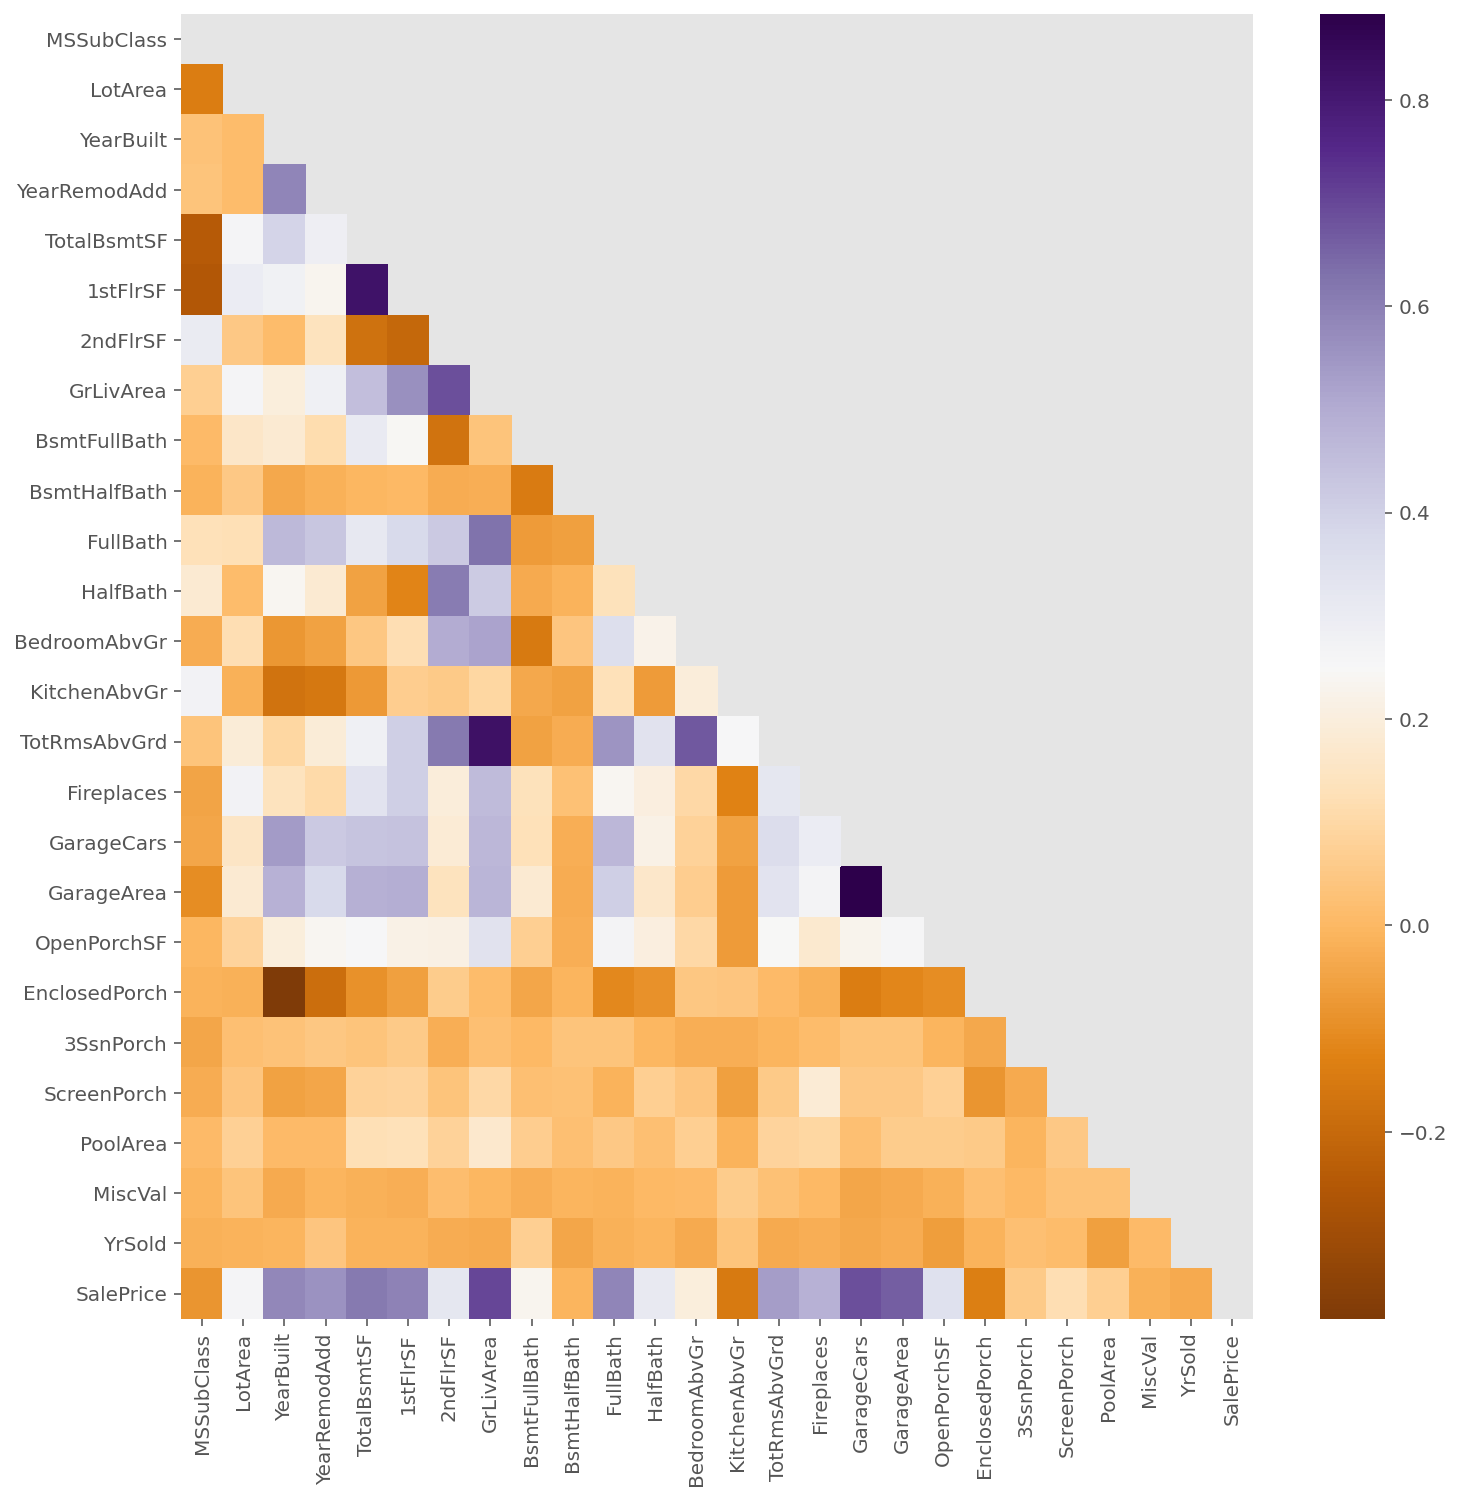

In [58]:
def correlation_heat_map(house_fixed): 
    corrs = house_fixed.corr()
    fig, ax = plt.subplots(figsize=(12,12)) 
    
    mask = np.zeros_like(corrs, dtype=np.bool) 
    mask[np.triu_indices_from(mask)] = True
    
    ax = sns.heatmap(corrs, mask=mask, cmap='PuOr') 

    ax.set_xticklabels(ax.xaxis.get_ticklabels()) 
    ax.set_yticklabels(ax.yaxis.get_ticklabels()) 
    plt.show()

correlation_heat_map(house_fixed)

In [59]:
abs(house_fixed.corr(method='spearman')['SalePrice']).sort_values(ascending=False)[1:]

GrLivArea        0.732134
GarageCars       0.693763
GarageArea       0.654254
YearBuilt        0.648573
FullBath         0.633056
TotalBsmtSF      0.600416
1stFlrSF         0.572587
YearRemodAdd     0.565743
TotRmsAbvGrd     0.533663
Fireplaces       0.515363
OpenPorchSF      0.480353
LotArea          0.458966
HalfBath         0.340353
2ndFlrSF         0.295259
BedroomAbvGr     0.228222
BsmtFullBath     0.221016
EnclosedPorch    0.208786
KitchenAbvGr     0.167235
ScreenPorch      0.099899
3SsnPorch        0.064586
PoolArea         0.058228
MiscVal          0.053936
YrSold           0.025740
BsmtHalfBath     0.012847
MSSubClass       0.004562
Name: SalePrice, dtype: float64

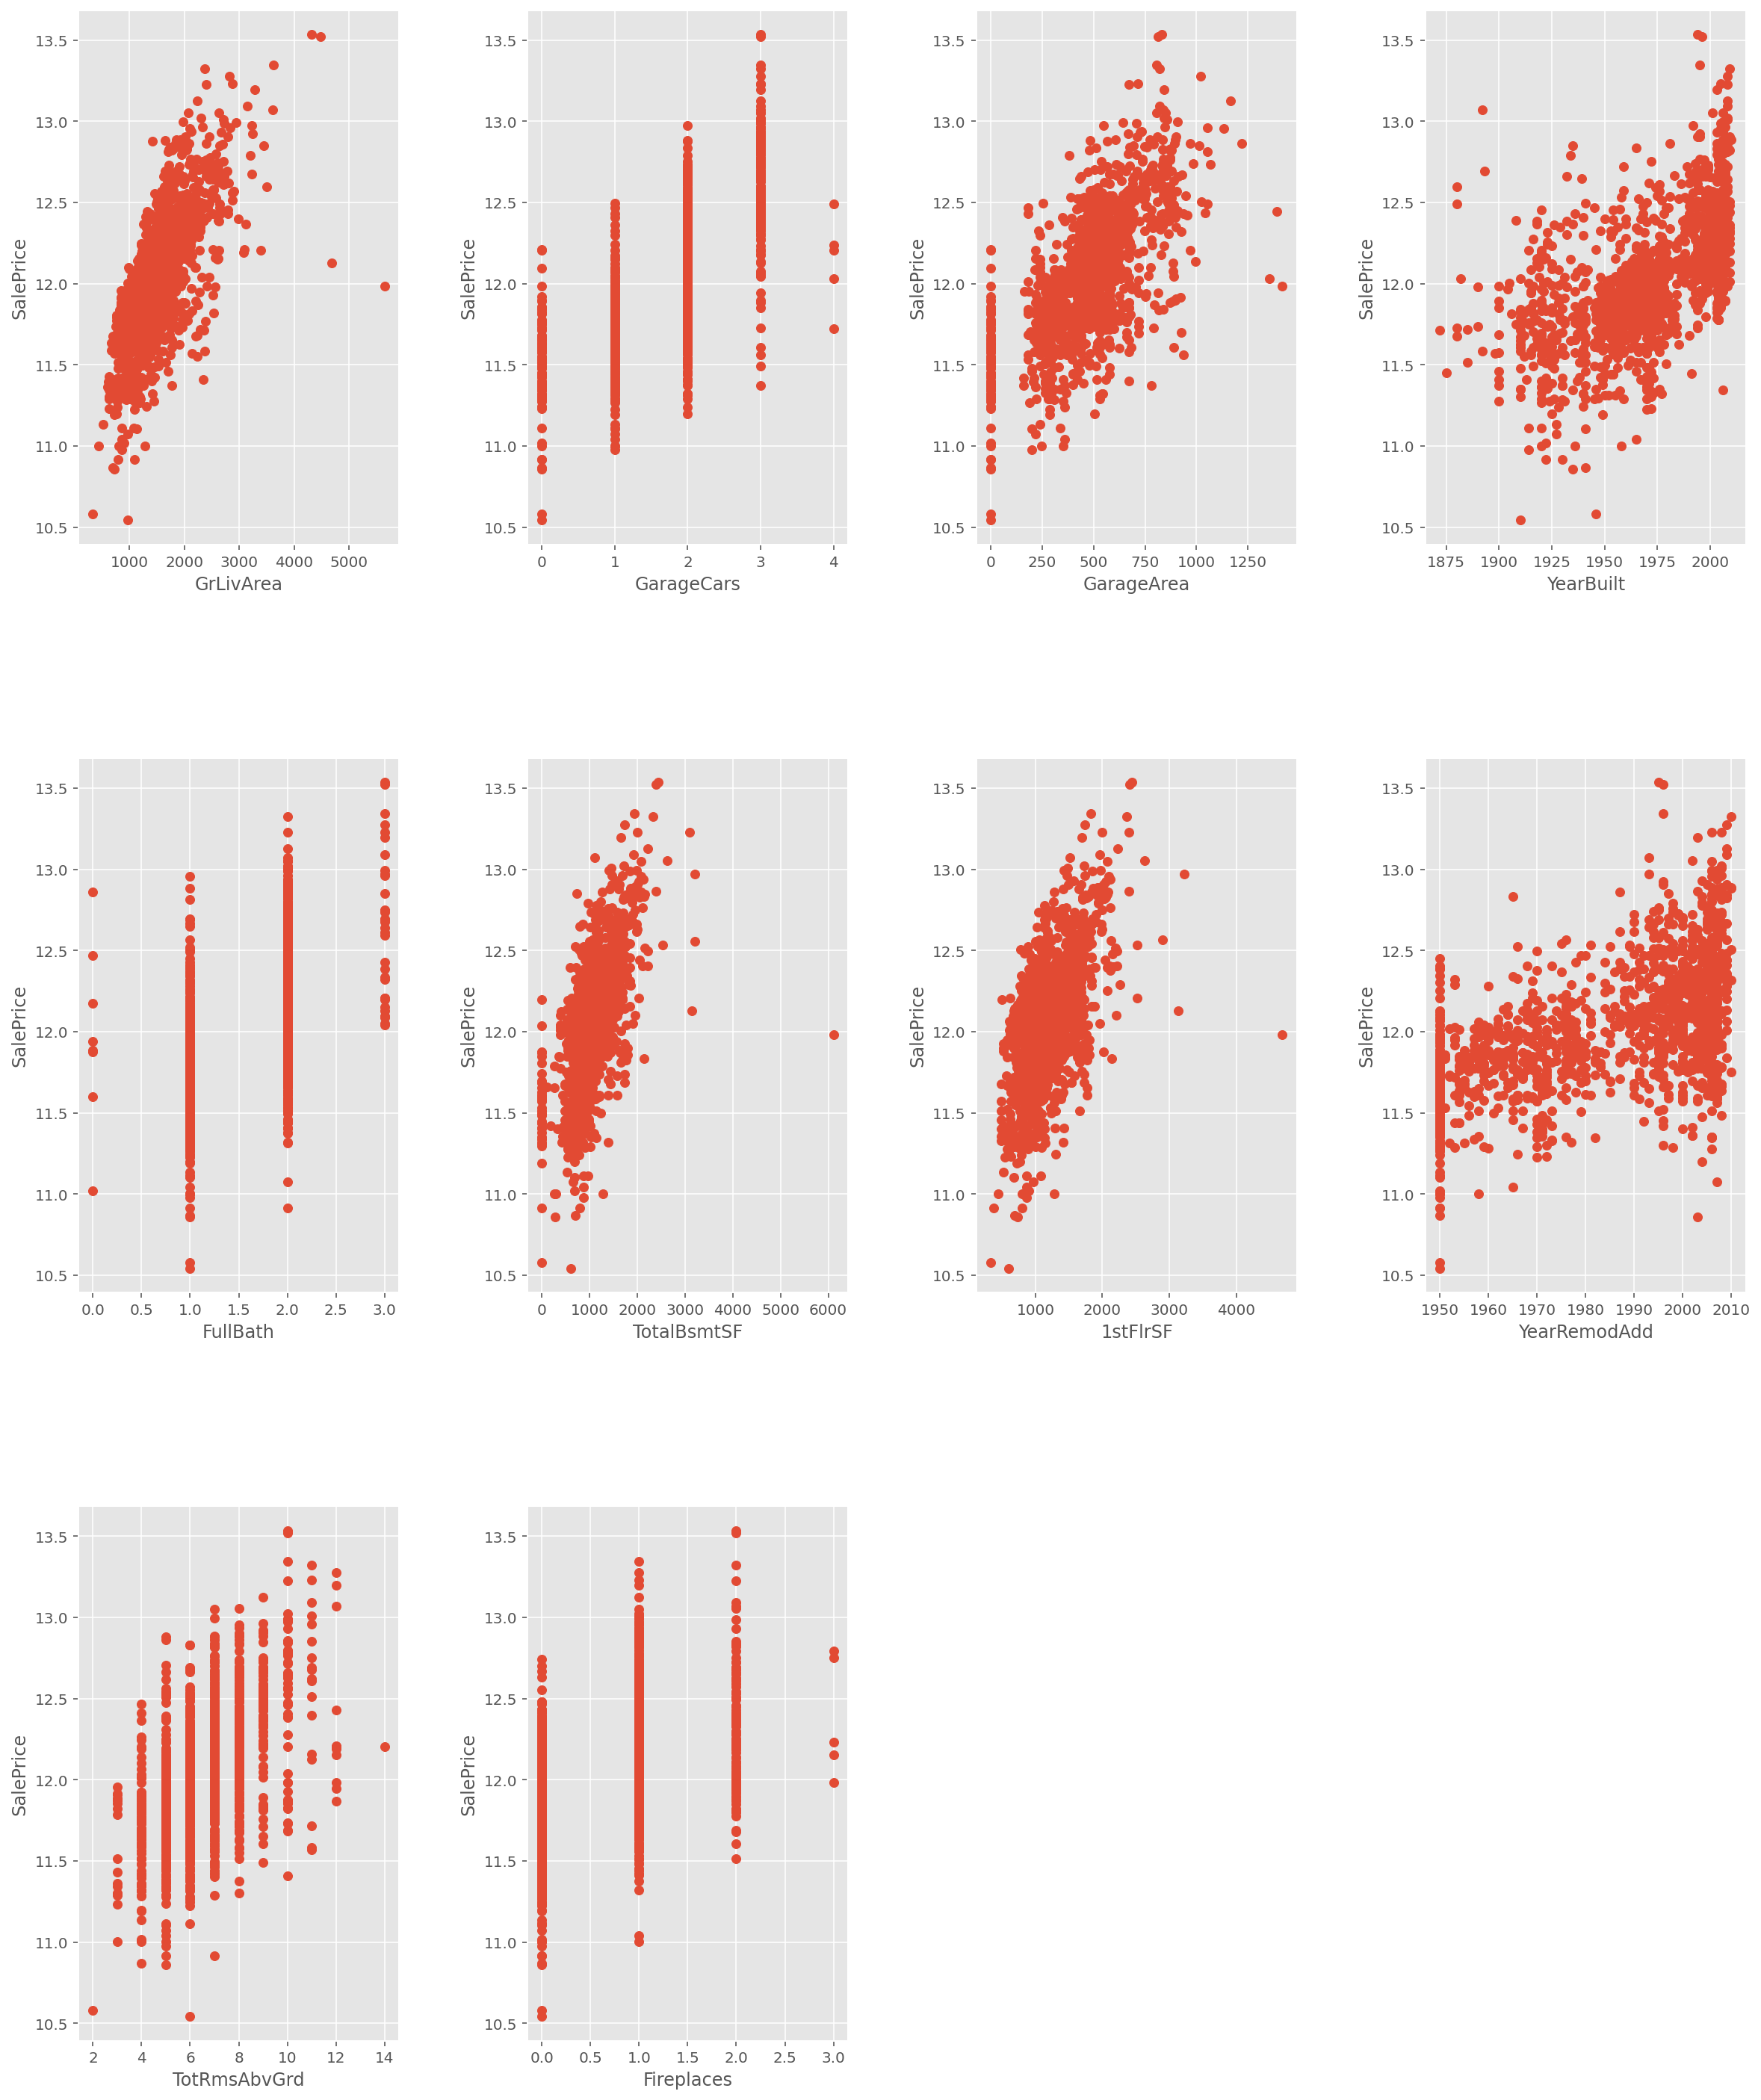

In [60]:
# Plotting the first 10 fixed charact as per corr matrix.
columns = abs(house_fixed.corr(method='spearman')['SalePrice']).sort_values(ascending=False)[1:11].index.values
fig = plt.figure(figsize=(20,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 11):
    ax = fig.add_subplot(3, 4, i)
    ax.scatter(x=columns[i-1], y='SalePrice', data=house_fixed)
    ax.set_xlabel(columns[i-1])
    ax.set_ylabel('SalePrice')

After seeing the correlation between TotRmsAbvGrd and GrLivArea amd
GarageArea and GarageCars, will remove them from the dataset. I will also 
remove GarageYrBlt as not really relevant(according to the corr matrix).

In [61]:
house_fixed = house_fixed.drop(['GarageCars','TotRmsAbvGrd','GarageYrBlt'],axis=1)

In [62]:
abs(house_fixed.corr(method='spearman')['SalePrice']).sort_values(ascending=False)[1:]

GrLivArea        0.732134
GarageArea       0.654254
YearBuilt        0.648573
FullBath         0.633056
TotalBsmtSF      0.600416
1stFlrSF         0.572587
YearRemodAdd     0.565743
Fireplaces       0.515363
OpenPorchSF      0.480353
LotArea          0.458966
HalfBath         0.340353
2ndFlrSF         0.295259
BedroomAbvGr     0.228222
BsmtFullBath     0.221016
EnclosedPorch    0.208786
KitchenAbvGr     0.167235
ScreenPorch      0.099899
3SsnPorch        0.064586
PoolArea         0.058228
MiscVal          0.053936
YrSold           0.025740
BsmtHalfBath     0.012847
MSSubClass       0.004562
Name: SalePrice, dtype: float64

In [63]:
house_fixed.shape

(1450, 42)

I will dummify the dataset before splitting into before 2010 and 2010

In [64]:
hfdum = pd.get_dummies(house_fixed,columns=['MSSubClass','MSZoning',
      'LotShape','LandContour','Utilities','LotConfig','LandSlope',
    'Neighborhood','Condition1','Condition2', 'BldgType', 'HouseStyle',
    'Foundation', 'BsmtQual', 'BsmtExposure',   'KitchenAbvGr', 'Fireplaces', 
    'GarageType', 'MiscFeature' ],drop_first=True) 

In [65]:
hfdum

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,65,8450,2003,2003,196,856,856,854,1710,1,...,1,0,0,0,0,0,1,0,0,0
1,80,9600,1976,1976,0,1262,1262,0,1262,0,...,1,0,0,0,0,0,1,0,0,0
2,68,11250,2001,2002,162,920,920,866,1786,1,...,1,0,0,0,0,0,1,0,0,0
3,60,9550,1915,1970,0,756,961,756,1717,1,...,0,0,0,0,1,0,1,0,0,0
4,84,14260,2000,2000,350,1145,1145,1053,2198,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62,7917,1999,2000,0,953,953,694,1647,0,...,1,0,0,0,0,0,1,0,0,0
1456,85,13175,1978,1988,119,1542,2073,0,2073,1,...,1,0,0,0,0,0,1,0,0,0
1457,66,9042,1941,2006,0,1152,1188,1152,2340,0,...,1,0,0,0,0,0,0,0,1,0
1458,68,9717,1950,1996,0,1078,1078,0,1078,1,...,1,0,0,0,0,0,1,0,0,0


In [66]:
hfdum.shape

(1450, 132)

take the dataset up to 2010 with fixed charactheristics


In [67]:
type(hfdum['YrSold'][0])

numpy.int64

In [68]:
hfdum_2010 = hfdum[(house_fixed.YrSold < 2010)]

In [69]:
hfdum_2010.YrSold.value_counts()

2009    336
2007    328
2006    312
2008    302
Name: YrSold, dtype: int64

In [70]:
hfdum_2010.shape

(1278, 132)

In [71]:
hfdum_2011 = hfdum[(hfdum.YrSold >= 2010)]
hfdum_2011.YrSold.value_counts()

2010    172
Name: YrSold, dtype: int64

In [72]:
hfdum_2011.shape

(172, 132)

Specify predictor matrix and target variable

In [73]:
y = hfdum_2010.SalePrice
X = hfdum_2010.drop(['SalePrice'],axis=1)

specify train test split 

In [74]:
X_train = X
X_test = hfdum_2011.drop(['SalePrice'], axis=1)
y_train = y
y_test = hfdum_2011.SalePrice

In [75]:
X_train

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,65,8450,2003,2003,196,856,856,854,1710,1,...,1,0,0,0,0,0,1,0,0,0
1,80,9600,1976,1976,0,1262,1262,0,1262,0,...,1,0,0,0,0,0,1,0,0,0
2,68,11250,2001,2002,162,920,920,866,1786,1,...,1,0,0,0,0,0,1,0,0,0
3,60,9550,1915,1970,0,756,961,756,1717,1,...,0,0,0,0,1,0,1,0,0,0
4,84,14260,2000,2000,350,1145,1145,1053,2198,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,35,3675,2005,2005,80,547,1072,0,1072,1,...,0,1,0,0,0,0,1,0,0,0
1453,90,17217,2006,2006,0,1140,1140,0,1140,0,...,0,0,0,0,0,1,1,0,0,0
1454,62,7500,2004,2005,0,1221,1221,0,1221,1,...,1,0,0,0,0,0,1,0,0,0
1455,62,7917,1999,2000,0,953,953,694,1647,0,...,1,0,0,0,0,0,1,0,0,0


In [76]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       ...
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_No Garage',
       'MiscFeature_None', 'MiscFeature_Othr', 'MiscFeature_Shed',
       'MiscFeature_TenC'],
      dtype='object', length=131)

In [77]:
# Standardize the data

In [78]:
from sklearn.model_selection import train_test_split, cross_val_score,  KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn import metrics

In [79]:
scaler = StandardScaler() #sub mean and divide by st deviation - 
# quantities are not n0 st dev above or below the mean
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns) #dataframe better than array
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [80]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

In [81]:
# create a linear regression model instance
model = LinearRegression()
# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=kf)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [-1.96086647e+22  8.63012731e-01 -2.04710318e+21 -1.06469949e+23
 -4.27280654e+23]
Mean cross-validated training score: -1.110812742528188e+23
Training Score: 0.8915062194203804
Test Score: 0.881823586368724


In [82]:
# linregrcoef= pd.DataFrame({'variable':X_train.columns,\
#                             'coef':model.coef_,\
#                             'abs_coef':np.abs(model.coef_)})

In [83]:
# linregrcoef.sort_values('abs_coef', inplace=True, ascending=False)

In [84]:
# linregrcoef.shape

In [85]:
# linregrcoef.head(20)

In [86]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.coef_abs.sort_values(ascending=False
                            )

BldgType_Duplex        4.002219e+10
MSSubClass_90          4.002219e+10
GrLivArea              1.103038e-01
GarageType_Attchd      9.729174e-02
GarageType_Detchd      8.116385e-02
                           ...     
BedroomAbvGr           2.712917e-04
Neighborhood_BrDale    1.586475e-04
HouseStyle_SLvl        1.410719e-04
Foundation_Stone       1.008905e-04
Condition2_RRAn        7.136808e-05
Name: coef_abs, Length: 131, dtype: float64

In [87]:
# add columns and try this
# pd.DataFrame(list(zip(X.columns, model.coef_[0])), 
#              columns=['feature', 'coef'])\
#     .sort_values(by='coef') \
#     .plot(kind='barh', x='feature', y='coef', figsize=(8, 12))
# plt.show()

In [88]:
df_coef.sort_values(by="coef_abs",ascending=False).head(40)

,coefficients,coef_abs
BldgType_Duplex,4.002219e+10,4.002219e+10
MSSubClass_90,-4.002219e+10,4.002219e+10
GrLivArea,1.103038e-01,1.103038e-01
GarageType_Attchd,9.729174e-02,9.729174e-02
GarageType_Detchd,8.116385e-02,8.116385e-02
MiscFeature_None,6.215764e-02,6.215764e-02
MSSubClass_160,-5.824834e-02,5.824834e-02
MiscFeature_Shed,5.450168e-02,5.450168e-02
YearBuilt,5.229954e-02,5.229954e-02
YearRemodAdd,5.180695e-02,5.180695e-02


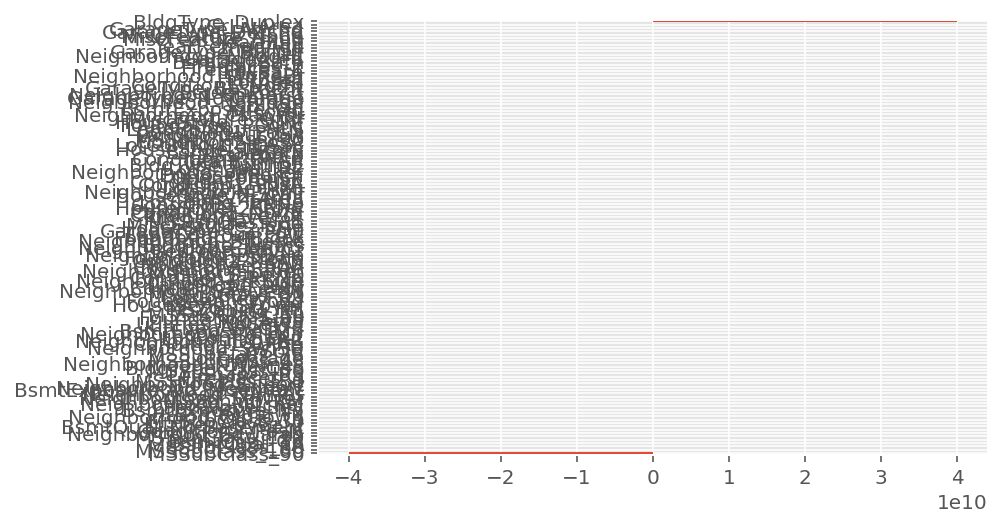

In [89]:
# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values().plot(kind='barh');

In [90]:
# create a RidgeCV model instance
model = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=kf)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)
# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 166.81005372000558
Training score: 0.88553575783218
Test Score: 0.8876996242769196


In [91]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef['coef_abs'].sort_values(ascending=False).head(40) 

GrLivArea                   0.060279
YearRemodAdd                0.049722
1stFlrSF                    0.040502
Neighborhood_NridgHt        0.037288
2ndFlrSF                    0.036154
GarageArea                  0.035135
YearBuilt                   0.032332
FullBath                    0.031953
BsmtQual_TA                 0.029019
Fireplaces_2                0.028184
BsmtFullBath                0.028126
Fireplaces_1                0.027589
TotalBsmtSF                 0.024628
Neighborhood_StoneBr        0.024468
Neighborhood_Edwards        0.023326
MSSubClass_30               0.022800
HalfBath                    0.021308
Neighborhood_Somerst        0.021194
MSSubClass_160              0.019794
BsmtQual_Gd                 0.019518
Condition2_PosN             0.019035
Neighborhood_Crawfor        0.018906
Neighborhood_NoRidge        0.018614
GarageType_No Garage        0.017961
LotArea                     0.017597
ScreenPorch                 0.016875
BsmtExposure_Gd             0.016684
B

In [92]:
alpha = model.alpha_
# create a Ridge model instance
model = Ridge(alpha=alpha)

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=kf)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.78841143 0.86923434 0.85003939 0.86949386 0.8680899 ]
Mean cross-validated training score: 0.8490537825309852
Training Score: 0.88553575783218
Test Score: 0.8876996242769196


In [93]:
# create a LassoCV model instance
model = LassoCV(n_alphas=500, cv=kf, n_jobs=-1,max_iter=100000)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)
# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 0.000677303551029638
Training score: 0.8898483300133625
Test Score: 0.8909668022809198


In [94]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef['coef_abs'].sort_values(ascending=False).head(40) 

GrLivArea                   0.138478
YearBuilt                   0.054280
YearRemodAdd                0.053733
BsmtQual_TA                 0.045814
Neighborhood_NridgHt        0.042017
MSSubClass_160              0.041617
BsmtQual_Gd                 0.037025
MSSubClass_60               0.032286
BsmtFullBath                0.031032
Fireplaces_1                0.030749
Fireplaces_2                0.030736
GarageArea                  0.029409
Neighborhood_StoneBr        0.027232
FullBath                    0.027073
Neighborhood_Somerst        0.025036
Condition2_PosN             0.023498
Neighborhood_Edwards        0.021380
LotArea                     0.021003
MSSubClass_30               0.020383
HalfBath                    0.020241
Neighborhood_NoRidge        0.020194
Neighborhood_Crawfor        0.020132
GarageType_No Garage        0.019229
BsmtQual_No Basement        0.019221
MSSubClass_120              0.018887
ScreenPorch                 0.018335
BsmtQual_Fa                 0.017592
B

In [95]:
alpha = model.alpha_
# create a Lasso model instance
model = Lasso(alpha=alpha)

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=kf)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.77241203 0.87315181 0.85305419 0.86652246 0.86615462]
Mean cross-validated training score: 0.8462590217963942
Training Score: 0.8898483300133625
Test Score: 0.8909668022809198


In [96]:
# create an ElastinNetCV model instance
model = ElasticNetCV(n_alphas=500, 
                     l1_ratio=np.array([0.00001, .1, .5, .7, .9, .95, .99, 1]),
                     cv=kf, max_iter=100000,n_jobs=-1)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)
# get the best l1-ratio
print('Best l1-ratio:', model.l1_ratio_)
# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 0.01069498417158479
Best l1-ratio: 0.1
Training score: 0.8883639729713082
Test Score: 0.8942459458896493


In [97]:
alpha = model.alpha_ 
l1_ratio = model.l1_ratio_
# create an ElasticNet model instance
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=kf)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.77176292 0.87473962 0.85362144 0.86860498 0.86643451]
Mean cross-validated training score: 0.8470326938197201
Training Score: 0.8883639729713082
Test Score: 0.8942459458896493


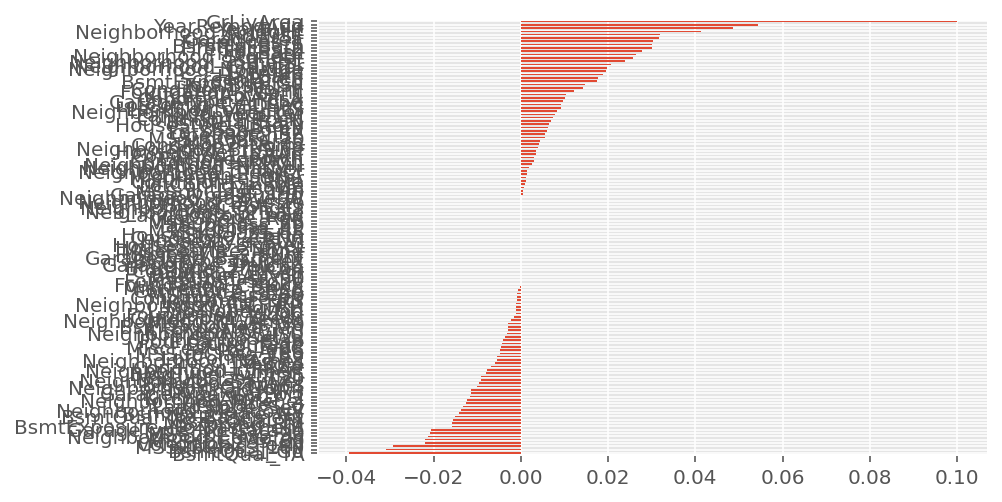

In [98]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values() .plot(kind='barh');

In [99]:
df_coef['coef_abs'].sort_values(ascending=False).head(40)

GrLivArea                   0.100070
YearRemodAdd                0.054398
YearBuilt                   0.048673
Neighborhood_NridgHt        0.041240
BsmtQual_TA                 0.039495
2ndFlrSF                    0.031883
GarageArea                  0.031649
BsmtQual_Gd                 0.030823
Fireplaces_1                0.030207
BsmtFullBath                0.030148
Fireplaces_2                0.030122
MSSubClass_160              0.029246
FullBath                    0.027802
Neighborhood_StoneBr        0.026444
1stFlrSF                    0.025826
Neighborhood_Somerst        0.023876
Condition2_PosN             0.022044
MSSubClass_60               0.022000
Neighborhood_Edwards        0.021390
MSSubClass_30               0.020785
GarageType_No Garage        0.020714
Neighborhood_Crawfor        0.020573
Neighborhood_NoRidge        0.019781
LotArea                     0.019411
HalfBath                    0.018861
ScreenPorch                 0.017703
BsmtExposure_Gd             0.017362
B

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovatable features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

MODEL 2 i will start getting my residual first as the target variable from the elsticnet ehich l1=0.7


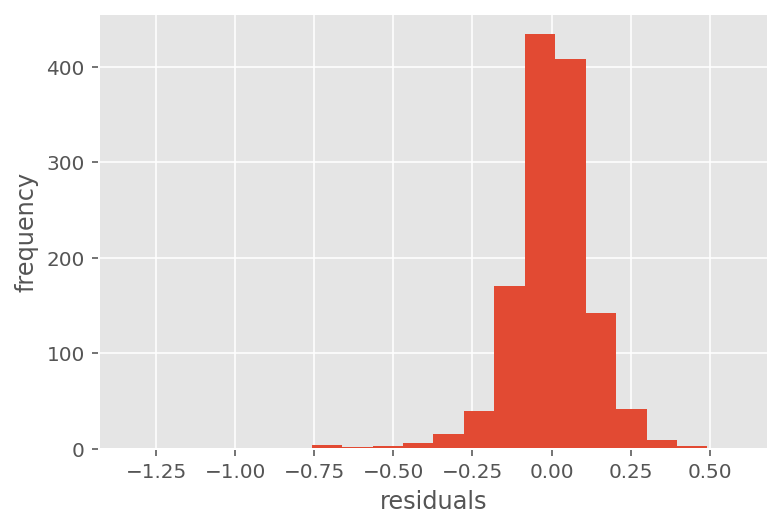

In [100]:
# The residuals from the test dataset is approximately normal distribution.
y_pred_train = model.predict(X_train)
residual_train = y_train - y_pred_train
residual_train.hist(bins=20)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.show()

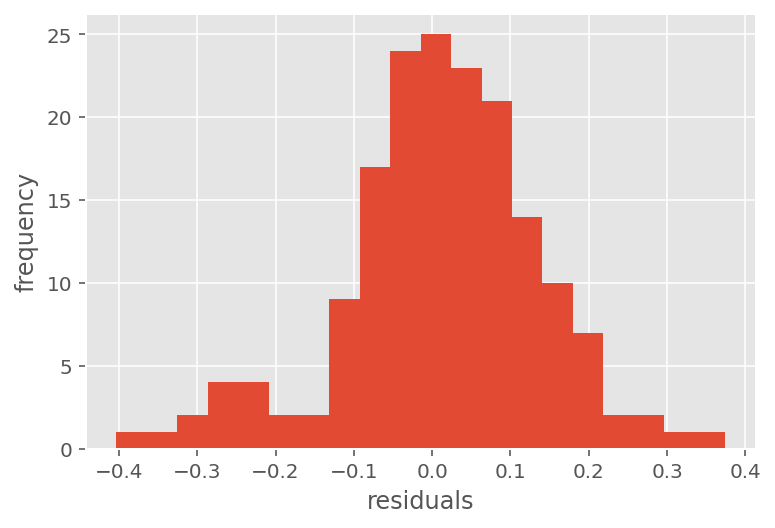

In [101]:
# The residuals from the test dataset is approximately normal distribution with some outliers on the right side.
y_pred_test = model.predict(X_test)
residual_test = y_test - y_pred_test
residual_test.hist(bins=20)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.show()

In [102]:
# house['residual_train'] = residual_train
# house.residual_train.isna().value_counts()

In [103]:
# house.residual_train.fillna(0)

I will then define the variable charactheristics

In [104]:
# Creating a  new DataFrame.
variable = [
    'Street','OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
    'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'ExterQual', 'ExterCond', 'BsmtFinType1', 'BsmtFinType2', 
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtCond',
    'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
    'LowQualFinSF', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'WoodDeckSF',
    'GarageQual', 'GarageCond', 'PoolQC', 'Fence','YrSold'
]

In [105]:
house_var = house[variable]

In [106]:
house_var

,Street,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,...,LowQualFinSF,KitchenQual,FireplaceQu,GarageFinish,WoodDeckSF,GarageQual,GarageCond,PoolQC,Fence,YrSold
0,Pave,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,...,0,Gd,No Fireplace,RFn,0,TA,TA,No Pool,No Fence,2008
1,Pave,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,...,0,TA,TA,RFn,298,TA,TA,No Pool,No Fence,2007
2,Pave,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,...,0,Gd,TA,RFn,0,TA,TA,No Pool,No Fence,2008
3,Pave,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,...,0,Gd,Gd,Unf,0,TA,TA,No Pool,No Fence,2006
4,Pave,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,...,0,Gd,TA,RFn,192,TA,TA,No Pool,No Fence,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,6,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,...,0,TA,TA,RFn,0,TA,TA,No Pool,No Fence,2007
1456,Pave,6,6,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,...,0,TA,TA,Unf,349,TA,TA,No Pool,MnPrv,2010
1457,Pave,7,9,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,...,0,Gd,Gd,RFn,0,TA,TA,No Pool,GdPrv,2010
1458,Pave,5,6,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,...,0,Gd,No Fireplace,Unf,366,TA,TA,No Pool,No Fence,2010


In [107]:
house_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Street        1450 non-null   object
 1   OverallQual   1450 non-null   int64 
 2   OverallCond   1450 non-null   int64 
 3   RoofStyle     1450 non-null   object
 4   RoofMatl      1450 non-null   object
 5   Exterior1st   1450 non-null   object
 6   Exterior2nd   1450 non-null   object
 7   MasVnrType    1450 non-null   object
 8   ExterQual     1450 non-null   object
 9   ExterCond     1450 non-null   object
 10  BsmtFinType1  1450 non-null   object
 11  BsmtFinType2  1450 non-null   object
 12  BsmtFinSF1    1450 non-null   int64 
 13  BsmtFinSF2    1450 non-null   int64 
 14  BsmtUnfSF     1450 non-null   int64 
 15  BsmtCond      1450 non-null   object
 16  Heating       1450 non-null   object
 17  HeatingQC     1450 non-null   object
 18  CentralAir    1450 non-null   object
 19  Electr

Checking if the distribution of the most important variables

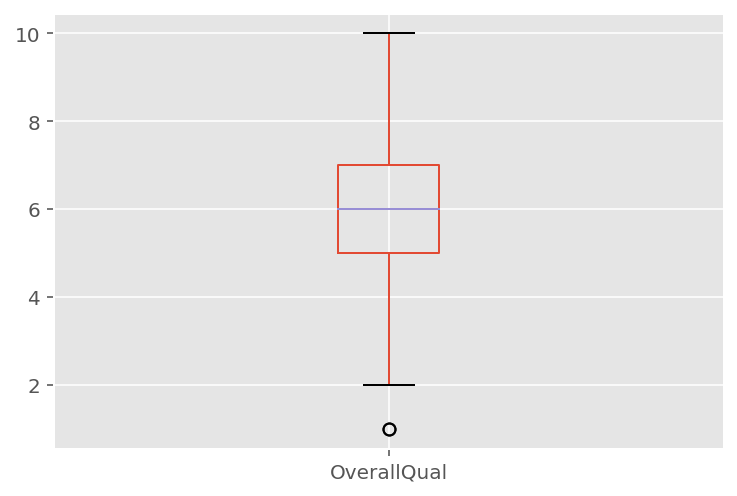

In [140]:
house_var['OverallQual'].plot.box()
plt.show()

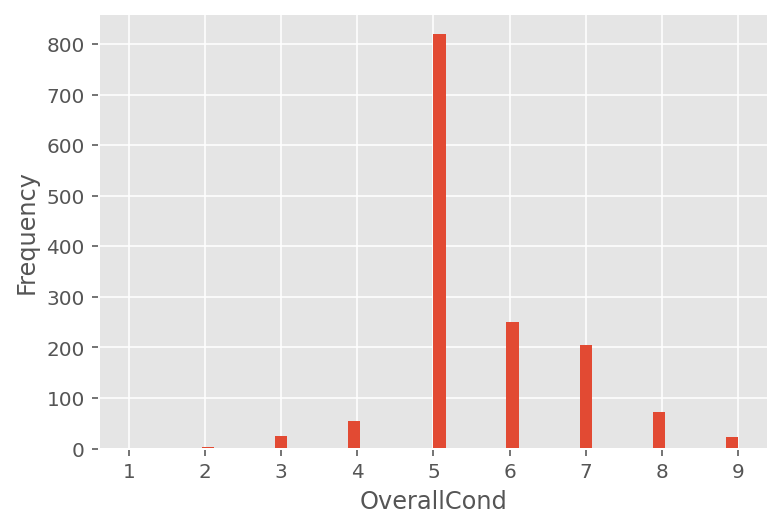

In [141]:
house_var['OverallCond'].hist(bins=50)
plt.xlabel('OverallCond')
plt.ylabel('Frequency')
plt.show()

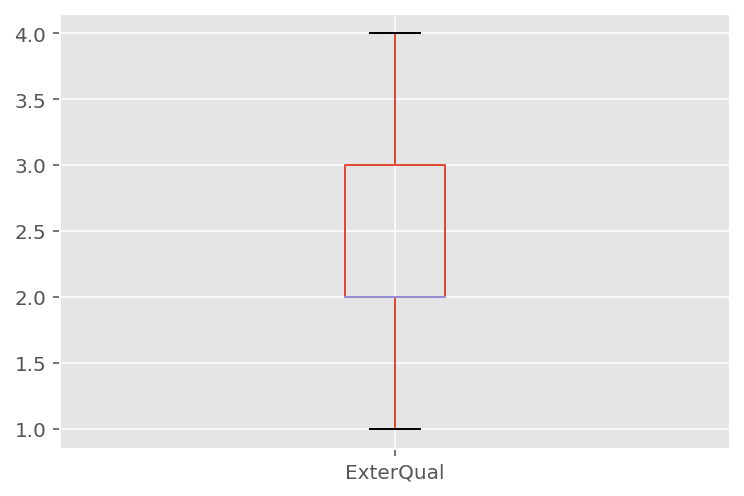

In [142]:
house_var['ExterQual'].plot.box()
plt.show()

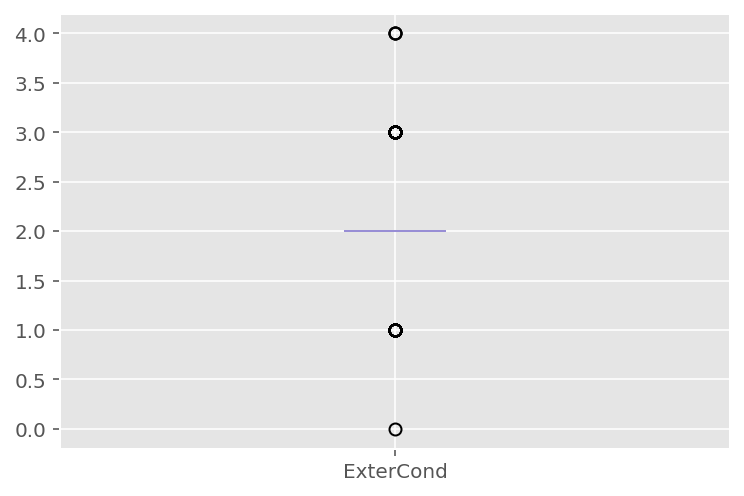

In [143]:
house_var['ExterCond'].plot.box()
plt.show()

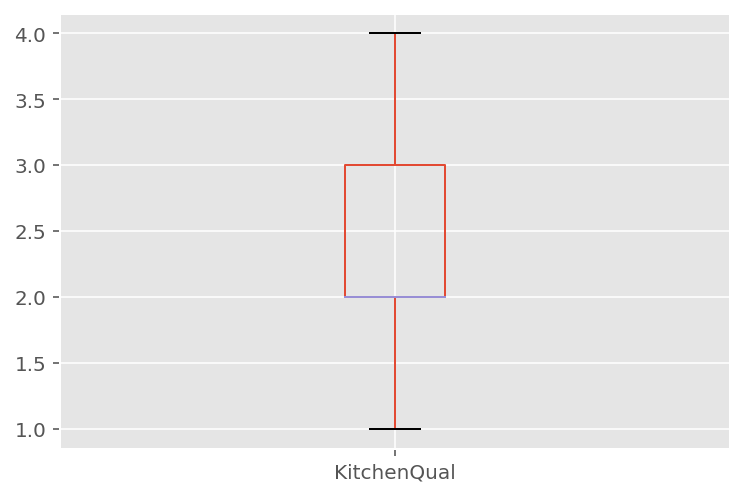

In [144]:
house_var['KitchenQual'].plot.box()
plt.show()

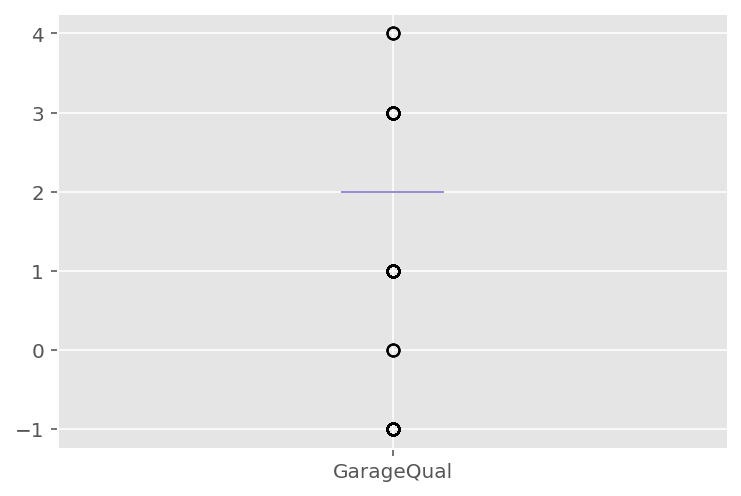

In [146]:
house_var['GarageQual'].plot.box()
plt.show()

In [ ]:
house_var['KitchenQual'].plot.box()
plt.show()

In [108]:
house_var.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [109]:
house_var.ExterCond.unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [110]:
house_var.BsmtCond.unique()

array(['TA', 'Gd', 'No Basement', 'Fa', 'Po'], dtype=object)

In [111]:
house_var.ExterCond.unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [112]:
house_var.HeatingQC.unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [113]:
house_var.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [114]:
house_var.FireplaceQu.unique()

array(['No Fireplace', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [115]:
house_var.GarageQual.unique()

array(['TA', 'Fa', 'Gd', 'No Garage', 'Ex', 'Po'], dtype=object)

In [116]:
house_var.GarageCond.unique()

array(['TA', 'No Garage', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [117]:
house_var.PoolQC.unique()

array(['No Pool', 'Ex', 'Fa', 'Gd'], dtype=object)

I WILL TRANSOFRM THE CATEGORICAL VARIABLES INTO NUMBERS AS THEY ALL HAVE THE SAME SCALE AND 
THEY COULD IMPROVE MY MODEL. THEY ALL HAVE TO DO WITH QUALITY OR CONDITION.


In [118]:
qual_cond = [
    'ExterQual', 'ExterCond', 'BsmtCond', 
    'HeatingQC', 'KitchenQual', 'FireplaceQu', 
    'GarageQual', 'GarageCond', 'PoolQC'
]

In [119]:
score = {
    'No Basement':-1,
    'No Fireplace':-1,
    'No Pool': -1,
    'No Garage' : -1,
    'NA': -1,
    'Po': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}

In [120]:
for cond in qual_cond:
    house_var[cond] = house_var[cond].map(score)

<ipython-input-120-e2acbed0590d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_var[cond] = house_var[cond].map(score)


In [121]:
house_var[cond] = house_var[cond].astype(float)

<ipython-input-121-e539e6a940a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_var[cond] = house_var[cond].astype(float)


In [122]:
house_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Street        1450 non-null   object 
 1   OverallQual   1450 non-null   int64  
 2   OverallCond   1450 non-null   int64  
 3   RoofStyle     1450 non-null   object 
 4   RoofMatl      1450 non-null   object 
 5   Exterior1st   1450 non-null   object 
 6   Exterior2nd   1450 non-null   object 
 7   MasVnrType    1450 non-null   object 
 8   ExterQual     1450 non-null   int64  
 9   ExterCond     1450 non-null   int64  
 10  BsmtFinType1  1450 non-null   object 
 11  BsmtFinType2  1450 non-null   object 
 12  BsmtFinSF1    1450 non-null   int64  
 13  BsmtFinSF2    1450 non-null   int64  
 14  BsmtUnfSF     1450 non-null   int64  
 15  BsmtCond      1450 non-null   int64  
 16  Heating       1450 non-null   object 
 17  HeatingQC     1450 non-null   int64  
 18  CentralAir    1450 non-null 

In [123]:
house_var.ExterQual.unique()

array([3, 2, 4, 1])

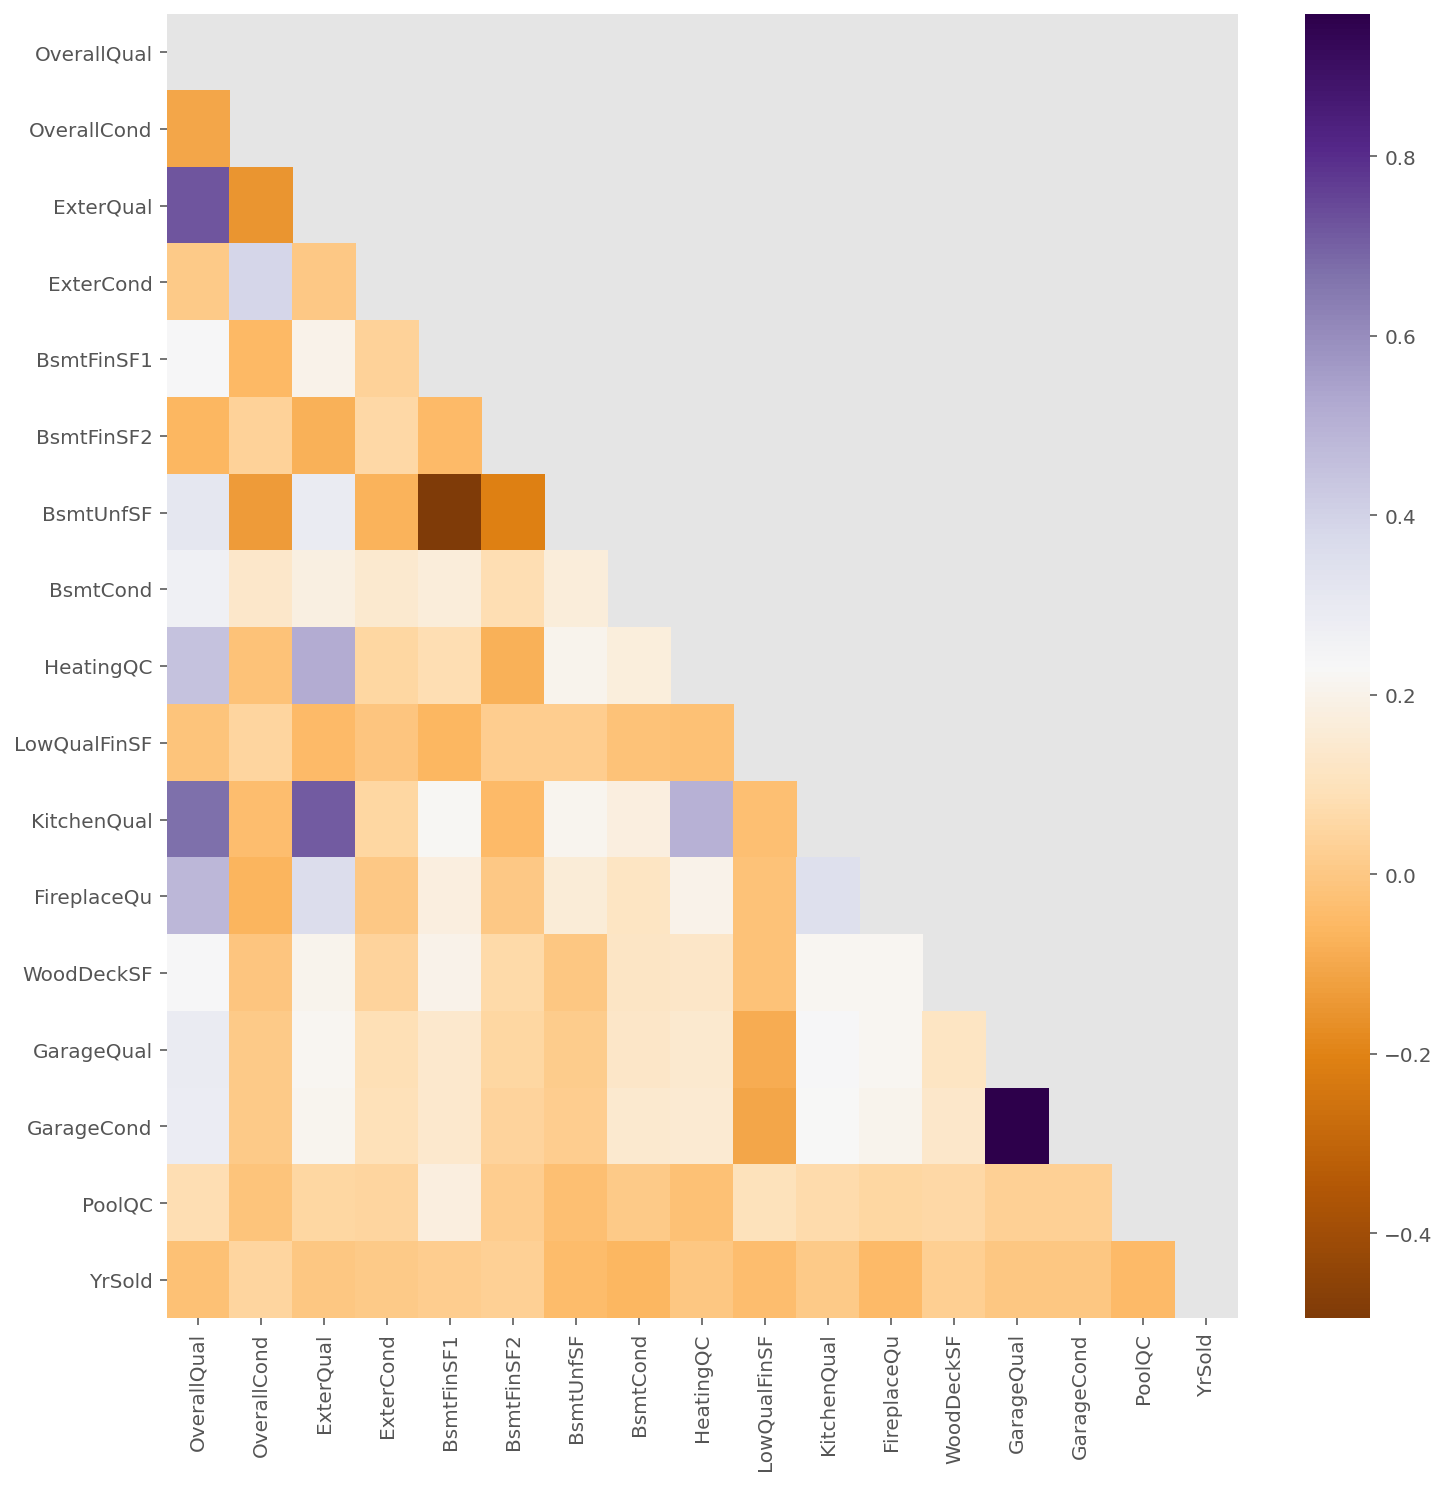

In [124]:
def correlation_heat_map(house_var): 
    corrs = house_var.corr()
    fig, ax = plt.subplots(figsize=(12,12)) 
    
    mask = np.zeros_like(corrs, dtype=np.bool) 
    mask[np.triu_indices_from(mask)] = True
    
    ax = sns.heatmap(corrs, mask=mask, cmap='PuOr') 

    ax.set_xticklabels(ax.xaxis.get_ticklabels()) 
    ax.set_yticklabels(ax.yaxis.get_ticklabels()) 
    plt.show()

correlation_heat_map(house_var)

In [125]:
abs(house_var.corr(method='spearman')['ExterQual']).sort_values(ascending=False)[1:]

KitchenQual     0.723126
OverallQual     0.714806
HeatingQC       0.550063
FireplaceQu     0.349149
WoodDeckSF      0.245060
BsmtUnfSF       0.244096
OverallCond     0.239179
GarageQual      0.218083
GarageCond      0.212736
BsmtCond        0.189420
BsmtFinSF2      0.135117
BsmtFinSF1      0.115143
LowQualFinSF    0.043356
PoolQC          0.033459
ExterCond       0.013781
YrSold          0.009680
Name: ExterQual, dtype: float64

Some renoavtable variables are highly correlated hence I would expect this 
will decrease the strenght of the results.

Creating dummmy variables

In [135]:
# hvdum = pd.get_dummies(house_var,columns=['ExterQual', 'ExterCond', 'BsmtCond', 
#     'HeatingQC', 'KitchenQual', 'FireplaceQu', 
#     'GarageQual', 'GarageCond', 'PoolQC'
# ],drop_first=True) 

remove sqft variables --------

In [126]:
hvdum = pd.get_dummies(house_var,columns=['Street','OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
    'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'ExterQual', 'ExterCond', 'BsmtFinType1', 'BsmtFinType2',  'BsmtCond',
    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
    'GarageQual', 'GarageCond', 'PoolQC', 'Fence'],drop_first=True) 

In [127]:
hvdum_2010 = hvdum[(house_var.YrSold < 2010)]

In [128]:
hvdum_2010.shape

(1278, 134)

In [129]:
hvdum_2011 = hvdum[(hvdum.YrSold >= 2010)]
hvdum_2011.shape

(172, 134)

Secify Train/test Split

In [130]:
X_train2 = hvdum_2010.drop(['YrSold'],axis=1)
X_test2 = hvdum_2011.drop(['YrSold'], axis=1)
y_train2 = residual_train
y_test2 = residual_test

Trying with Ridge first

In [131]:
# create a RidgeCV model instance
model = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=kf)
# fit the model
model.fit(X_train2, y_train2)
# get the best alpha
print('Best alpha:', model.alpha_)
# evaluate on the training set
print('Training score:', model.score(X_train2, y_train2))
# evaluate on the test set
print("Test Score:", model.score(X_test2, y_test2))

Best alpha: 21.54434690031882
Training score: 0.23684074248958054
Test Score: 0.058904348620095415


In [132]:
alpha = model.alpha_
# create a Ridge model instance
model = Ridge(alpha=alpha)

# get cross validated scores
scores = cross_val_score(model, X_train2, y_train2, cv=kf)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train2, y_train2)
print("Training Score:", model.score(X_train2, y_train2))
# evaluate the data on the test set
print("Test Score:", model.score(X_test2, y_test2))

Cross-validated training scores: [0.01830624 0.18474518 0.09797839 0.13814986 0.10540536]
Mean cross-validated training score: 0.10891700611381194
Training Score: 0.23684074248958054
Test Score: 0.058904348620095415


Testing Lasso but it appears to be very resource intensive and takes a long time to run

In [133]:
# alphas=np.logspace(-2, 2, 5) this out to improve time of calcs
# create a LassoCV model instance
model = LassoCV(n_alphas=100, cv=kf, n_jobs=-1,max_iter=10000000,verbose=1)
# fit the model
model.fit(X_train2, y_train2)
# get the best alpha
print('Best alpha:', model.alpha_)
# evaluate on the training set
print('Training score:', model.score(X_train2, y_train2))
# evaluate on the test set
print("Test Score:", model.score(X_test2, y_test2))

Best alpha: 0.002200491169259919
Training score: 0.11486862003185816
Test Score: 0.020820580896615315


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [134]:
alpha = model.alpha_
# create a Lasso model instance
model = Lasso(alpha=alpha)

# get cross validated scores
scores = cross_val_score(model, X_train2, y_train2, cv=kf)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train2, y_train2)
print("Training Score:", model.score(X_train2, y_train2))
# evaluate the data on the test set
print("Test Score:", model.score(X_test2, y_test2))

Cross-validated training scores: [-0.02244789  0.12490064  0.06839157  0.08906635  0.07782277]
Mean cross-validated training score: 0.06754668579447146
Training Score: 0.11486862003185816
Test Score: 0.020820580896615315


Test an Elastic net Model

In [135]:
# create an ElastinNetCV model instance
model2 = ElasticNetCV(n_alphas=100, 
                     l1_ratio=np.array([0.00001, .1, .5, .7, .9, .95, .99, 1]),
                     cv=kf, max_iter=100000,n_jobs=-1,verbose=1)
# fit the model
model2.fit(X_train2, y_train2)
# get the best alpha
print('Best alpha:', model2.alpha_)
# get the best l1-ratio
print('Best l1-ratio:', model2.l1_ratio_)
# evaluate on the training set
print('Training score:', model2.score(X_train2, y_train2))
# evaluate on the test set
print("Test Score:", model2.score(X_test2, y_test2))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Best alpha: 0.002200491169259919
Best l1-ratio: 1.0
Training score: 0.11486862003185816
Test Score: 0.020820580896615315


................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.4s finished


In [136]:
alpha = model2.alpha_ 
l1_ratio = model2.l1_ratio_
# create an ElasticNet model instance
model3 = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

# get cross validated scores
scores = cross_val_score(model3, X_train2, y_train2, cv=kf)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model3.fit(X_train2, y_train2)
print("Training Score:", model3.score(X_train2, y_train2))
# evaluate the data on the test set
print("Test Score:", model3.score(X_test2, y_test2))

Cross-validated training scores: [-0.02244789  0.12490064  0.06839157  0.08906635  0.07782277]
Mean cross-validated training score: 0.06754668579447146
Training Score: 0.11486862003185816
Test Score: 0.020820580896615315


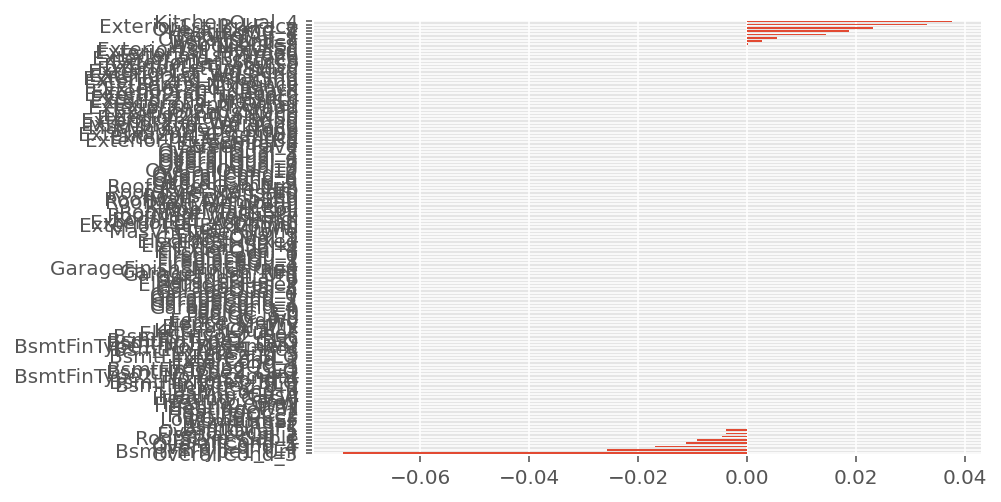

In [137]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model3.coef_, index=X_train2.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values() .plot(kind='barh');

In [138]:
df_coef['coef_abs'].sort_values(ascending=False).head(40)

OverallCond_3          0.074242
KitchenQual_4          0.037571
Exterior1st_BrkFace    0.032987
BsmtFinType1_Unf       0.025654
OverallCond_7          0.023072
HeatingQC_4            0.018733
OverallCond_4          0.016852
CentralAir_Y           0.014451
OverallCond_5          0.011245
BsmtCond_1             0.009269
OverallQual_8          0.005537
RoofStyle_Gable        0.004701
FireplaceQu_2          0.003901
OverallQual_5          0.003826
BsmtCond_2             0.002789
WoodDeckSF             0.000090
BsmtFinSF1             0.000026
BsmtFinSF2             0.000020
BsmtUnfSF              0.000014
LowQualFinSF           0.000006
Exterior2nd_BrkFace    0.000000
Exterior1st_Stone      0.000000
Exterior2nd_Stone      0.000000
Exterior2nd_Plywood    0.000000
Exterior1st_CemntBd    0.000000
Exterior1st_HdBoard    0.000000
Exterior1st_ImStucc    0.000000
Exterior1st_MetalSd    0.000000
Exterior1st_Plywood    0.000000
Exterior2nd_Other      0.000000
Exterior2nd_MetalSd    0.000000
Exterior

This second model doesn't seem to explain well the phenomenon.
In other words, we cannot renovate these feautures and selling the house
at a profit relying on the coefficients. I have removed variabls highly correlated among
each other with no success. Even removing variables doesn't improve the score but it 
actually slighlty decreases it.
THE SCORE ON THE 1ST MODEL IS IN THE MIF 80'S THREFORE WE CANNOT EXPECT A VERY HIGH SCORE HERE.
The best score is achieved with Ridge and the cross validated scores are fairly stable but it 
seems such a low score (0.1 or 0.14 wihtout transforming qual_cond into numerical variables.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. It is recommended to do some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [ ]:
# A: